# BIG SCREENS - BIG BUCKS
Can we find a model for a commercial success of movies?

In this part of our project we are exploring parameters impacting the commercial success of a movie with the ultimate goal of creating a regression model predicting a high return of investment.

I chose return of investment as it takes care of inflation on its own.

In [960]:
import pandas as pd
import numpy as np
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import table 

## DATA SOURCE:
https://www.kaggle.com/rounakbanik/the-movies-dataset

Please download 
movies_metadata.csv
credits.csv
for analysis

In [961]:
meta=pd.read_csv('movies_metadata.csv')

/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Meta contains
['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count']

In [962]:
#droping uninteresting columns
meta.drop(['homepage','adult','video'], axis=1, inplace=True)

In [963]:
meta.head()

,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


In [964]:
meta['release_date'].isnull().sum()

87

In [965]:
#release date to datetime
meta.release_date=pd.to_datetime(meta['release_date'], format='%Y-%m-%d', errors='coerce')

In [966]:
#rename id column to movie_id for better understanding and mergin later on
meta.rename(columns={'id': "movie_id"}, inplace=True)


## Credits CSV contains
['cast', 'crew', 'id']

In [967]:
credits=pd.read_csv('credits.csv')

In [ ]:
######################

## RETURN OF INVESTMENT
we measure commericial success not in high revenue but in high return of investment
**roi= (revenue−budget)/budget**

we can anly work with movie records that contain a budget and a revenue > 0

In [968]:
meta.dtypes

belongs_to_collection            object
budget                           object
genres                           object
movie_id                         object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                       object
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
dtype: object

#### clean 'budget' column
budget needs to be float instead of object

In [969]:
# zero isnull values
meta['budget'].isnull().sum()

0

In [970]:
#3 fields with letters
meta['budget'].str.contains('[A-Za-z]').sum()

3

In [971]:
meta['budget'][meta['budget'].str.contains('[A-Za-z]')]=0

<ipython-input-971-607dc0ea32fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['budget'][meta['budget'].str.contains('[A-Za-z]')]=0


In [972]:
meta['budget'].str.contains('[A-Za-z]').sum()

0

In [973]:
#convert 'budget' from str to float
meta['budget'] = meta['budget'].astype(float)

In [974]:
#most expensiv pictures pirates of the caribbean
meta.sort_values(by='budget',ascending=False)  

,belongs_to_collection,budget,genres,movie_id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
17124,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.8877,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,5068.0
11827,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",31.3637,/bXb00CkHqx7TPchTGG131sWV59y.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4627.0
26558,"{'id': 86311, 'name': 'The Avengers Collection...",280000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.3794,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6908.0
11067,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,13.2847,/e3aLTaD5ppxo3en0GAGceekEPAe.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,5.4,1429.0
16130,"{'id': 463959, 'name': 'Tangled Collection', '...",260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",38757,tt0398286,en,Tangled,When the kingdom's most wanted-and most charmi...,14.6848,/re6AOJbhBk9FIK3knwU6rYlbPDx.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,5.917949e+08,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18469,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}]",23340,tt0039743,en,Queen of the Amazons,Jean Preston is determined to find her fiancée...,0.415906,/aoLmY4NpySjAUOXxAM8nBwCwaae.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1947-01-15,0.000000e+00,61.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queen of the Amazons,3.0,3.0
18470,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",96495,tt1705969,en,Becoming Chaz,Documentary following Chaz (formerly Chastity)...,0.082658,/rd4O9w5RweVneKqgsOlCZO9g37s.jpg,...,[],2011-01-20,0.000000e+00,80.0,[],Released,NaN,Becoming Chaz,5.0,2.0
18471,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",35659,tt0087090,en,Countdown to Looking Glass,A fictional confrontation between the United S...,0.04179,/l0Ijw27P2Ts7o6312NClm6bFqlA.jpg,...,[],1984-10-14,0.000000e+00,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Countdown to Looking Glass,6.0,1.0
18474,NaN,0.0,[],142118,tt1672215,fi,Varasto,Antero Rousku is a storeman in a paint store. ...,0.469543,/dzma4vl1M63eTSicAYWG4QAT8ba.jpg,...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2011-12-30,0.000000e+00,0.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,NaN,The Storage,5.4,4.0


#### clean 'revenue' column

In [975]:
meta['revenue'].isnull().sum()

6

In [976]:
meta['revenue'][meta['revenue'].isnull()]=0

<ipython-input-976-95ce84f7689c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['revenue'][meta['revenue'].isnull()]=0


In [977]:
meta.shape

(45466, 21)

### filter budget and revenue

In [978]:
df_roi=meta[(meta['budget']>3000000)&(meta['revenue']>50000)]

In [979]:
len(df_roi)

4385

In [980]:
###oldest movie, newest movie
df_roi.sort_values(by='release_date',ascending=False).head()

,belongs_to_collection,budget,genres,movie_id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
44282,NaN,21000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",293768,tt1458169,en,Kidnap,Single mother Karla McCoy lives a perfect life...,20.214579,/9CabD3j9PrjRY054fL0WJuEcXHZ.jpg,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-08-04,24527158.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance is a Mother,Kidnap,6.0,244.0
45167,NaN,11000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",395834,tt5362988,en,Wind River,An FBI agent teams with the town's veteran gam...,40.796775,/fzsaNUcRH0cV2gg5rjQH83ZEI8M.jpg,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-08-03,184770205.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Nothing is harder to track than the truth.,Wind River,7.4,181.0
45014,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",353491,tt1648190,en,The Dark Tower,"The last Gunslinger, Roland Deschain, has been...",50.903593,/i9GUSgddIqrroubiLsvvMRYyRy0.jpg,...,"[{'iso_3166_1': 'ZA', 'name': 'South Africa'},...",2017-08-03,71000000.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There are other worlds than these,The Dark Tower,5.7,688.0
45139,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",378236,tt4877122,en,The Emoji Movie,"Gene, a multi-expressional emoji, sets out on ...",33.694599,/f5pF4OYzh4wb1dYL2ARQNdqUsEZ.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-07-28,66913939.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Not easy being meh,The Emoji Movie,5.8,327.0
44632,NaN,30000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",341013,tt2406566,en,Atomic Blonde,An undercover MI6 agent is sent to Berlin duri...,14.455104,/kV9R5h0Yct1kR8Hf8sJ1nX0Vz4x.jpg,...,"[{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...",2017-07-26,90007945.0,115.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",Released,NaN,Atomic Blonde,6.1,748.0


## INSERT COLUMN RETURN OF INVESTMENT

In [981]:
#create return of investment column 'roi'
df_roi['roi']=(df_roi['revenue']-df_roi['budget']) / df_roi['budget']

<ipython-input-981-c762d9914759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roi['roi']=(df_roi['revenue']-df_roi['budget']) / df_roi['budget']


#### sort for return of investment

In [982]:
df_roi.sort_values(by='roi',ascending=False).tail()

,belongs_to_collection,budget,genres,movie_id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,roi
4890,NaN,15000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",24206,tt0117653,en,Silent Trigger,Waxman is a former Special Forces soldier who ...,1.67241,/xwlxtpOadsET3mE5VRHsm5wnE1Z.jpg,...,1996-06-26,76382.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Terms are Clear. Kill or be Killed.,Silent Trigger,5.0,22.0,-0.994908
23364,NaN,15000000.0,"[{'id': 35, 'name': 'Comedy'}]",187596,tt2463288,en,Walk of Shame,A reporter's dream of becoming a news anchor i...,7.84471,/5TGX6do5nemPYyHCptjqHzU4HfR.jpg,...,2014-05-02,59209.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Awesome night. Epic aftermath.,Walk of Shame,5.8,561.0,-0.996053
19956,NaN,30000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",76349,tt1772230,zh,辛亥革命,"At the beginning of the 20th century, China is...",3.83513,/4B553EK5EWUc28Jvl2vZ3xwDWF4.jpg,...,2011-07-03,108348.0,125.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Fall of the Last Empire,1911,5.0,41.0,-0.996388
5033,NaN,23000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",35614,tt0108395,en,A Troll in Central Park,A friendly troll with a magic green thumb grow...,3.61209,/4bx2egBIgvpocZj7Wq2z7CAMcs4.jpg,...,1994-10-07,71368.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Believe in Yourself and You Can Do Anything!,A Troll in Central Park,4.4,40.0,-0.996897
25732,NaN,65000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",116977,tt0249516,en,Foodfight!,"Dex, a superdog sleuth, is the law of the land...",6.69359,/S2kjcBpq4eGItUBeUC5TLjDubI.jpg,...,2012-06-15,73706.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,When good food... goes bad!,Foodfight!,2.3,28.0,-0.998866


## RETURN OF INVESTMENT OVER TIME
How did it develope?

In [989]:
#mean return of investment by year
roi_time=df_roi.groupby(df_roi.release_date.dt.year).mean().reset_index()

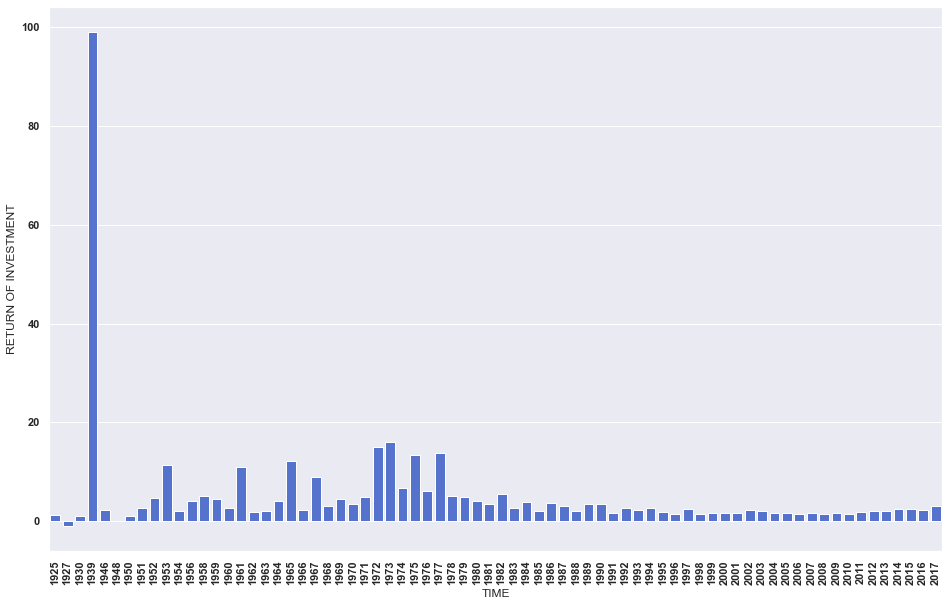

In [990]:
#sns.barplot(df_roi,x='release_date', y=df_roi['roi'])

plt.figure(figsize=(16,10))
sns.set(font_scale=1)
sns.barplot(x='release_date', y="roi", data=roi_time, color='royalblue')
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.ylabel('RETURN OF INVESTMENT')
plt.xlabel('TIME')
plt.savefig('roi_over_time_1.png')
plt.show()




In [959]:
#1939 OUTLIER IS GONE WITH THE WIND
df_roi[df_roi['release_date'].dt.year==1939]

,belongs_to_collection,budget,genres,movie_id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,roi
893,NaN,4000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",770,tt0031381,en,Gone with the Wind,An American classic in which a manipulative wo...,14.2404,/4o1yeosjSFMaI9pe1rOkYcZ6hHO.jpg,...,1939-12-15,400176459.0,238.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest romance of all time!,Gone with the Wind,7.7,995.0,99.044115


In [749]:
#drop year 1939
roi_time=roi_time[roi_time['release_date']!=1939]

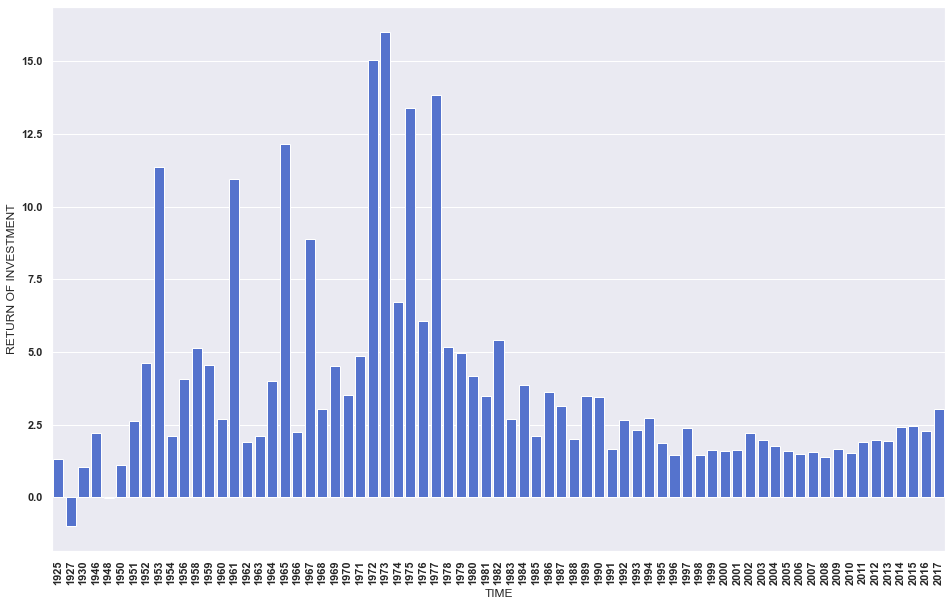

In [928]:
# PLOT AGAIN WITHOUT GONE WITH THE WIND
plt.figure(figsize=(16,10))
sns.set(font_scale=1)
sns.barplot(x='release_date', y="roi", data=roi_time, color='royalblue')
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.ylabel('RETURN OF INVESTMENT')
plt.xlabel('TIME')
plt.savefig('roi_over_time_2.png')
plt.show()


### lets start 1980: DATASET THIN IN EARLY YEARS
dataset is thin in early years

In [1019]:
film_per_year.columns

Index(['movie_id'], dtype='object')

<ipython-input-1024-9821feaf01ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_per_year['year']=df_roi.release_date.dt.year
/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


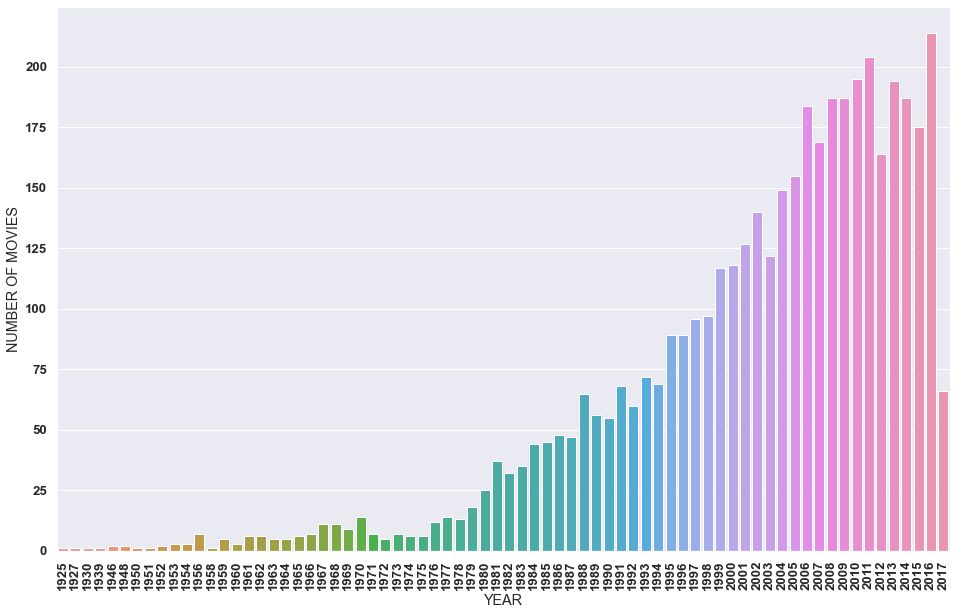

In [1024]:
film_per_year=df_roi[['release_date','title','movie_id','roi']]
film_per_year['year']=df_roi.release_date.dt.year
film_per_year.drop('release_date', axis=1,inplace=True)
film_per_year=pd.pivot_table(film_per_year, index='year', values='movie_id', aggfunc='count').reset_index()
######
plt.figure(figsize=(16,10))
sns.set(font_scale=1.2)
sns.set_style("darkgrid")
sns.barplot(data=film_per_year, x='year',y='movie_id')
plt.xticks(rotation=90)
plt.ylabel('NUMBER OF MOVIES')
plt.xlabel('YEAR')
plt.savefig('movie_count_over_time.png')
plt.show()

### EXCLUSE EVERYTHING BEFORE 1980
PUT YEAR COLUMN INTO df_roi DATAFREAM

In [1025]:
df_roi['year']=df_roi.release_date.dt.year

<ipython-input-1025-3bf2628e6337>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roi['year']=df_roi.release_date.dt.year


In [1027]:
df_roi=df_roi[df_roi['year']>1979]

#### DISTRIBUTION OF RETURN OF INVESTMENT

/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


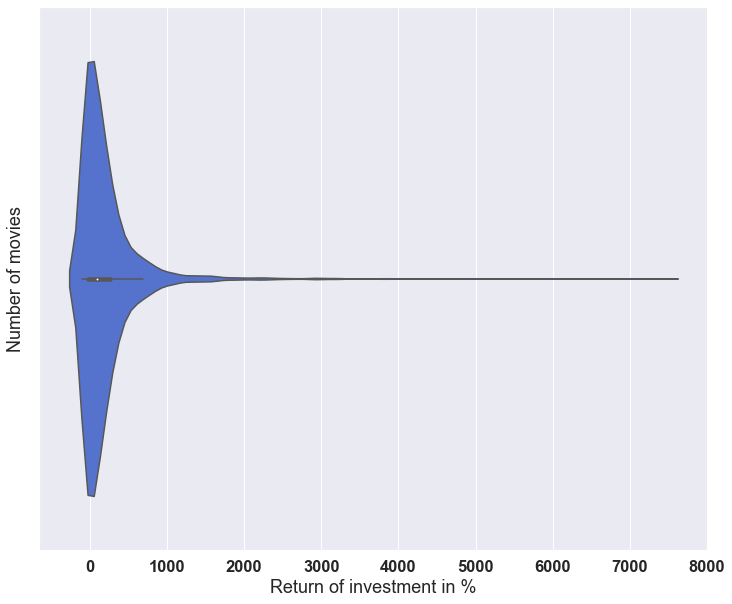

<Figure size 720x360 with 0 Axes>

In [1031]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
sns.violinplot(df_roi['roi']*100,color='royalblue')
sns.set_style("darkgrid")

plt.ylabel('Number of movies')
plt.xlabel('Return of investment in %')
plt.show()
plt.savefig('returnofinvest_violin.png')

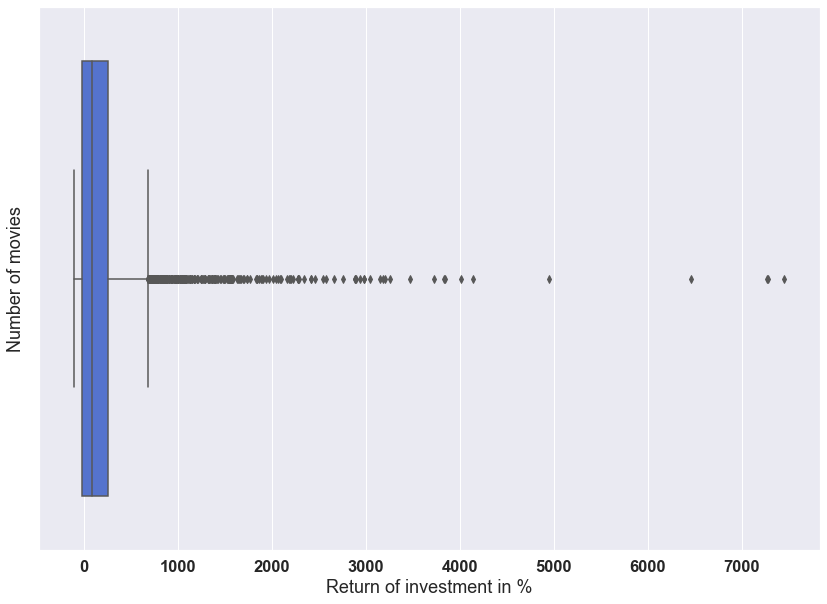

In [1032]:
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.boxplot(x=df_roi['roi']*100,color='royalblue')
plt.ylabel('Number of movies')
plt.xlabel('Return of investment in %')
### SAVE AS PNG 
plt.savefig('returnofinvest_box.png')

In [1039]:
df_roi[['title','roi','year']].sort_values(by='roi',ascending=False).head(15).reset_index().drop('index',axis=1)

,title,roi,year
0,E.T. the Extra-Terrestrial,74.520507,1982
1,My Big Fat Greek Wedding,72.748809,2002
2,The Full Monty,72.671463,1997
3,Crocodile Dundee,64.640701,1986
4,Get Out,49.486850,2017
5,Four Weddings and a Funeral,41.450139,1994
6,Paranormal Activity 3,40.140764,2011
7,Look Who's Talking,38.466667,1989
8,Annabelle,38.272894,2014
9,Saw II,37.231273,2005


In [1033]:
print('Number of movies: ', len(df_roi))
print('Negative ROI: ', len(df_roi[df_roi['roi']<0]))
print('Positive ROI: ', len(df_roi[df_roi['roi']>0]))
print('---\n',df_roi['roi'].describe())


Number of movies:  4183
Negative ROI:  1289
Positive ROI:  2893
---
 count    4183.000000
mean        2.059596
std         4.506246
min        -0.998866
25%        -0.220168
50%         0.895864
75%         2.614702
max        74.520507
Name: roi, dtype: float64


## CREATE FRANCHISE COLUMN
column belongs_to_collection indicates if film is part of a series or franchisehome alone
we could investigate if being part of a franchise gives a film a significant boost

In [1040]:
df_roi['franchise']=np.where(df_roi['belongs_to_collection'].isnull(),0,1)


<ipython-input-1040-ac407910213f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roi['franchise']=np.where(df_roi['belongs_to_collection'].isnull(),0,1)


## ADDING DIRECTORS

In [1041]:
crew_df = credits[['crew', 'id']]
crew_df['crew'] = crew_df['crew'].apply(lambda x: eval(x))
crew_df.rename(columns={'id': "movie_id"}, inplace=True)
crew_df

<ipython-input-1041-0bdd6d62d818>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crew_df['crew'] = crew_df['crew'].apply(lambda x: eval(x))
/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,crew,movie_id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...
45471,"[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [1042]:
# before use explode on crew dataframe I'll filter it for only the movies that are relevant in my df_roi with return of investment

crew_df=crew_df[crew_df['movie_id'].isin(set(df_roi['movie_id'])) ]
crew_df

,crew,movie_id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
5,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
8,"[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
...,...,...
45024,"[{'credit_id': '5912cf71c3a36864d40533b7', 'de...",353491
45149,"[{'credit_id': '5952d8f1c3a368151c025d0e', 'de...",378236
45177,"[{'credit_id': '572815d0c3a3687a00001314', 'de...",395834
45260,"[{'credit_id': '52fe447ec3a368484e02663b', 'de...",24049


In [1043]:
crew_exploded = crew_df.explode('crew')


In [1044]:

df_crew = pd.concat([crew_exploded.drop(['crew'], axis=1), crew_exploded['crew'].apply(pd.Series)], axis=1)


In [1045]:
#filter I only want the directors
df_director=df_crew[df_crew['job']=='Director']

#renaming columns to make sense, dropping columns i dont need
df_director.rename(columns={'id': "director_id", 'name':'director_name', 'gender':'director_gender'}, inplace=True)
df_director.drop(['profile_path','department','credit_id'], axis=1,inplace=True)
df_director

/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,movie_id,director_gender,director_id,job,director_name
0,862,2,7879,Director,John Lasseter
1,8844,2,4945,Director,Joe Johnston
3,31357,2,2178,Director,Forest Whitaker
5,949,2,638,Director,Michael Mann
8,9091,2,37710,Director,Peter Hyams
...,...,...,...,...,...
45024,353491,2,74752,Director,Nikolaj Arcel
45149,378236,0,89112,Director,Anthony Leondis
45177,395834,2,1215399,Director,Taylor Sheridan
45260,24049,2,91552,Director,S. Shankar


In [1046]:
#MOVIES WITH MULTIPLE DIRECTORS
# EXAMPLE: movie_id 2266 is Paris je t'aime with 21 direcots credited
director_count=pd.pivot_table(df_director, values='director_id', index='movie_id', aggfunc='count').sort_values('director_id',ascending=False)


In [1047]:
mulitdirector=director_count[director_count['director_id']>1] # films with more than 1 director
mulitdirector.index

singledirector=director_count[director_count['director_id']==1] # films with more than 1 director
singledirector.index

Int64Index([ 41233,  41515,  39473,  39486,  41154,  39513,  39538,  39514,
             41283,  41556,
            ...
              9954,   9958,   9959,   9962,   9963,   9972,   9975,   9978,
              9980, 440642],
           dtype='int64', name='movie_id', length=3916)

In [1048]:
#directors of movies that only have a single director
df_director_singel=df_director[df_director['movie_id'].isin(singledirector.index)]


In [1049]:
df_director_singel

,movie_id,director_gender,director_id,job,director_name
0,862,2,7879,Director,John Lasseter
1,8844,2,4945,Director,Joe Johnston
3,31357,2,2178,Director,Forest Whitaker
5,949,2,638,Director,Michael Mann
8,9091,2,37710,Director,Peter Hyams
...,...,...,...,...,...
45024,353491,2,74752,Director,Nikolaj Arcel
45149,378236,0,89112,Director,Anthony Leondis
45177,395834,2,1215399,Director,Taylor Sheridan
45260,24049,2,91552,Director,S. Shankar


### MERGE FILM WITH DIRECTORS

In [1050]:
df_roi['movie_id'] = df_roi['movie_id'].astype(int)

df_roi=df_roi.merge(df_director_singel,how='left', on='movie_id')

<ipython-input-1050-f0a60274090f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roi['movie_id'] = df_roi['movie_id'].astype(int)


In [1051]:
# check nan values after merge
df_roi.isnull().sum()

belongs_to_collection    3172
budget                      0
genres                      0
movie_id                    0
imdb_id                     0
original_language           0
original_title              0
overview                    7
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                   450
title                       0
vote_average                0
vote_count                  0
roi                         0
year                        0
franchise                   0
director_gender           267
director_id               267
job                       267
director_name             267
dtype: int64

In [1052]:
#after merge job column not necessary
df_roi.drop('job',inplace=True, axis=1)

In [1053]:
#direcots and there count of movies in the dataframe
df_roi['director_name'].value_counts().sort_values(ascending=False)

Steven Spielberg         25
Clint Eastwood           23
Ridley Scott             22
Woody Allen              19
Tim Burton               17
                         ..
Phil Alden Robinson       1
Patricia Birch            1
Lesli Linka Glatter       1
Gautham Vasudev Menon     1
Bejoy Nambiar             1
Name: director_name, Length: 1684, dtype: int64

## Create column: Does movie has multiple directors?
'Many cooks theory'
df['mulitple directors'] 1 if more than one director, else 0

In [1054]:
df_roi['multiple_directors']=np.where(df_roi['movie_id'].isin(mulitdirector.index),1,0)

In [1055]:
df_roi['multiple_directors'].value_counts()

0    3916
1     267
Name: multiple_directors, dtype: int64

## ADDING PRODUCERS

In [1056]:
df_producer=df_crew[df_crew['job']=='Producer']
df_producer=df_producer[df_producer['movie_id'].isin(set(df_roi['movie_id'])) ]
df_producer.rename(columns={'id': "producer_id",'name':'producer_name'}, inplace=True)
df_producer.drop(['profile_path','department','credit_id'], axis=1,inplace=True)
df_producer

,movie_id,gender,producer_id,job,producer_name
0,862,1,12894,Producer,Bonnie Arnold
0,862,2,12896,Producer,Ralph Guggenheim
1,8844,2,9184,Producer,Scott Kroopf
1,8844,2,42357,Producer,William Teitler
3,31357,0,5144,Producer,Ronald Bass
...,...,...,...,...,...
45177,395834,2,935798,Producer,Matthew George
45177,395834,2,67759,Producer,Basil Iwanyk
45177,395834,0,1614581,Producer,Wayne Rogers
45260,24049,0,91554,Producer,A. V. M. Saravanan


## CORRELATIONS CHECK

#### FRANCHISE vs RETURN OF INVESTMENT

In [1057]:
df_roi['roi'].corr(df_roi['franchise'])

0.22215462607700523

#### AVG VOTE vs RETURN OF INVESMENT

In [1058]:
df_roi['roi'].corr(df_roi['vote_average'])

0.23174378488001032

#### NUMBER OF VOTES vs RETURN OF INVESMENT

In [1059]:
df_roi['roi'].corr(df_roi['vote_count'])


0.2883599107710976

#### BUDGET vs RETURN OF INVESTMENT
correlation is negative: investing in a movie is a bad idea

In [1060]:
df_roi['roi'].corr(df_roi['budget'])

-0.04689200916604536

#### DIRECTORS MEAN RETURN OF INVESTMENT


In [1061]:
directos_roi=pd.pivot_table(df_roi, index='director_name',values=['roi','title'],  aggfunc={'roi':np.mean, 'title':np.sum}).sort_values('roi',ascending=False)
directos_roi.head(10)


,roi,title
director_name,,
Joel Zwick,72.748809,My Big Fat Greek Wedding
Jordan Peele,49.486850,Get Out
Peter Cattaneo,36.127828,The Full MontyThe Rocker
Marcus Dunstan,32.529412,The Collector
Peter Faiman,31.955760,Crocodile DundeeDutch
David F. Sandberg,29.381395,Lights Out
Nitesh Tiwari,28.807692,Dangal
Josh Boone,24.597236,The Fault in Our Stars
Darren Lynn Bousman,21.851406,Saw IISaw IIISaw IV


#### RUNTIME vs RETURN OF INVESTMENT

In [1062]:
df_roi['roi'].corr(df_roi['runtime'])

0.028579834517586663

#### Many cooks theory
surprising: multiple directors seem to have positive impact on roi.
maybe becuase low profile movies never have multiple directors?

In [1063]:
df_roi.columns

Index(['belongs_to_collection', 'budget', 'genres', 'movie_id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'roi', 'year',
       'franchise', 'director_gender', 'director_id', 'director_name',
       'multiple_directors'],
      dtype='object')

In [1064]:
df_roi['roi'].corr(df_roi['multiple_directors'])

0.036178329115325106

In [1065]:
len(directos_roi)



1684

# REGRESSION MODEL (1)
## 'franchise','vote_count', 'vote_average','budget','runtime'

In [1066]:
# Your code here:

X = df_roi[['franchise','vote_count', 'vote_average','budget','runtime']]
X = sm.add_constant(X) # We must add the intercept using the add_constant function
Y = df_roi.roi

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          2.02e-187
Time:                        09:29:04   Log-Likelihood:                -11793.
No. Observations:                4183   AIC:                         2.360e+04
Df Residuals:                    4177   BIC:                         2.364e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5638      0.549     -2.850      0.004      -2.639      -0.488
franchise        2.0367      0.156     13.055      0.000       1.731       2.343
vote_count       0.0012   6.45e-05     18.791      0.000       0.001       0.001
vote_average     0.6163      0.087      7.085      0.000       0.446       0.787
budget       -3.199e-08   1.91e-09    -16.730      0.000   -3.57e-08   -2.82e-08
runtime         -0.0046      0.003     -1.335      0.182      -0.011       0.002
==============================================================================
Omnibus:                     5361.062   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1339383.847
Skew:                           6.905   Prob(JB):                         0.00
Kurtosis:                      89.568   Cond. No.                     5.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1067]:
#what my model would predict for return of investment
Y_pred=model.predict(X)
Y_pred.sort_values()

3101    -4.105699
3319    -3.916478
2072    -3.820216
4167    -3.291353
1673    -3.132975
          ...    
3055    13.339322
684     13.694949
2361    13.829115
2759    14.675635
3634    16.542061
Length: 4183, dtype: float64

In [1068]:
#what return of investment actually is
Y.sort_values()

3613    -0.998866
1286    -0.996897
3217    -0.996388
3477    -0.996053
1256    -0.994908
          ...    
4100    49.486850
660     64.640701
408     72.671463
1307    72.748809
285     74.520507
Name: roi, Length: 4183, dtype: float64

In [1069]:
#discrepency between model and defact
residuals= Y - Y_pred
residuals.sort_values()

107    -12.208700
774    -12.015746
2759   -10.516055
3625    -9.756753
1221    -9.620503
          ...    
4100    43.647769
660     60.274866
1307    68.224509
285     68.385188
408     70.066318
Length: 4183, dtype: float64

#### interpretation

model explans only approx 18% of the variance in retunr of invesment (R-squared)

franchise::
being part of a franchise is strongly pushing return of investment

vote count::
the number of votes a film gets does have very very small positiv impact on return of investment

average vote::
the average rating a film got has a strong positiv impact on the retunr of investment

budget::
a high budget has a negative impact on the return of investment. Which mathematically sounds obvious runs against the business attitude that high production value enhances chance of commercial success.

runtime: the length of a movie hs no measurable impact on its return of investment.

# REGRESSION MODEL (2)
## directors

In [1096]:
df_roi.columns

Index(['belongs_to_collection', 'budget', 'genres', 'movie_id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'roi', 'year',
       'franchise', 'director_gender', 'director_id', 'director_name',
       'multiple_directors'],
      dtype='object')

In [1097]:
df_directors=df_roi[['roi','movie_id','director_name','title']]
df_directors

,roi,movie_id,director_name,title
0,11.451801,862,John Lasseter,Toy Story
1,3.043035,8844,Joe Johnston,Jumanji
2,4.090760,31357,Forest Whitaker,Waiting to Exhale
3,2.123947,949,Michael Mann,Heat
4,0.838576,9091,Peter Hyams,Sudden Death
...,...,...,...,...
4178,0.183333,353491,Nikolaj Arcel,The Dark Tower
4179,0.338279,378236,Anthony Leondis,The Emoji Movie
4180,15.797291,395834,Taylor Sheridan,Wind River
4181,0.583333,24049,S. Shankar,Sivaji: The Boss


#### only directors with at least 10 movies

In [1098]:
df_directors=df_directors.groupby('director_name').filter(lambda x: len(x) > 10)
df_directors

,roi,movie_id,director_name,title
6,0.739992,9087,Rob Reiner,The American President
7,-0.689051,10858,Oliver Stone,Nixon
8,-0.897782,1408,Renny Harlin,Cutthroat Island
9,1.232930,524,Martin Scorsese,Casino
15,-0.393939,9691,Richard Donner,Assassins
...,...,...,...,...
4040,1.933617,207932,Ron Howard,Inferno
4079,7.847606,381289,Lasse Hallström,A Dog's Purpose
4109,6.806066,173897,Paul W.S. Anderson,Resident Evil: The Final Chapter
4121,1.395673,126889,Ridley Scott,Alien: Covenant


In [1103]:
#which directors got worst mean return of investment
pd.pivot_table(df_directors,index=["director_name"], values=['roi','title'], aggfunc={'roi':np.mean,"title":np.sum}).sort_values(by='roi',ascending=False).reset_index()
# SPIKE LEE lowest mean roi We drop him to use him as a base line for the regression

,director_name,roi,title
0,Steven Spielberg,7.778132,Jurassic ParkSchindler's ListE.T. the Extra-Te...
1,Robert Zemeckis,4.130529,Forrest GumpBack to the FutureContactBack to t...
2,Tony Scott,3.286361,Crimson TideTrue RomanceThe FanDays of Thunder...
3,Michael Bay,2.915299,Bad BoysThe RockArmageddonPearl HarborBad Boys...
4,Clint Eastwood,2.878942,The Bridges of Madison CountyA Perfect WorldUn...
5,Lasse Hallström,2.878702,What's Eating Gilbert GrapeThe Cider House Rul...
6,Steven Soderbergh,2.753979,Out of SightThe LimeyErin BrockovichTrafficOce...
7,Barry Levinson,2.744979,DisclosureSleepersWag the DogSphereRain ManThe...
8,Tim Burton,2.428707,Ed WoodBatmanBatman ReturnsMars Attacks!Beetle...
9,Oliver Stone,2.412520,NixonNatural Born KillersPlatoonThe DoorsU Tur...


#### CREATE DIRECTOR DUMMIES

In [1104]:
#create director dummies
# drop director with lowes
dir_dummies=pd.get_dummies(df_directors['director_name'])
dir_dummies.drop('Spike Lee',axis=1, inplace=True)
dir_dummies.shape



(372, 24)

In [1105]:
#regress director against return of investment
X=dir_dummies#we drop first to create a line in the matrix where sum is not 1 but zero. in this case friday is dropped and is thereby defined by being zero. this is now the baseline to compare the other days against.
Y = df_directors['roi']
X = sm.add_constant(X)

model = sm.OLS (Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.685
Date:                Sat, 12 Dec 2020   Prob (F-statistic):             0.0245
Time:                        09:36:34   Log-Likelihood:                -1118.6
No. Observations:                 372   AIC:                             2287.
Df Residuals:                     347   BIC:                             2385.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5225      1.463      0.357      0.721      -2.354       3.399
Barry Levinson         2.2225      2.069      1.074      0.283      -1.846       6.291
Brian De Palma         0.2095      1.935      0.108      0.914      -3.596       4.015
Clint Eastwood         2.3564      1.804      1.306      0.192      -1.193       5.905
Joel Schumacher        0.9586      1.962      0.488      0.626      -2.901       4.818
Lasse Hallström        2.3562      2.115      1.114      0.266      -1.804       6.516
Martin Scorsese        0.6237      1.935      0.322      0.747      -3.182       4.430
Michael Bay            2.3928      2.028      1.180      0.239      -1.597       6.382
Oliver Stone           1.8900      1.910      0.989      0.323      -1.868       5.648
Paul W.S. Anderson     1.5509      2.115      0.733      0.464      -2.609       5.711
Renny Harlin           0.5018      1.993      0.252      0.801      -3.419       4.422
Richard Donner         1.8253      2.115      0.863      0.389      -2.335       5.985
Ridley Scott           0.4928      1.818      0.271      0.787      -3.084       4.069
Rob Reiner             1.2725      2.069      0.615      0.539      -2.796       5.341
Robert Rodriguez       1.2188      2.115      0.576      0.565      -2.941       5.379
Robert Zemeckis        3.6080      1.910      1.889      0.060      -0.150       7.366
Roland Emmerich        1.5987      2.115      0.756      0.450      -2.561       5.759
Ron Howard             1.8363      1.962      0.936      0.350      -2.024       5.696
Steven Soderbergh      2.2315      1.962      1.137      0.256      -1.628       6.091
Steven Spielberg       7.2556      1.780      4.077      0.000       3.756      10.756
Tim Burton             1.9062      1.910      0.998      0.319      -1.851       5.664
Tony Scott             2.7638      1.993      1.387      0.166      -1.157       6.685
Walter Hill            0.1721      2.115      0.081      0.935      -3.988       4.332
Wes Craven             1.7237      2.069      0.833      0.405      -2.345       5.792
Woody Allen            1.4513      1.868      0.777      0.438      -2.224       5.126
==============================================================================
Omnibus:                      554.212   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137726.593
Skew:                           7.582   Prob(JB):                         0.00
Kurtosis:                      96.036   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PICKING DATE FROM REGRESSION TABLE :: DIRECTORS

In [1110]:
director_table=pd.DataFrame()
director_table['coef']=model.params
director_table['conf_low']=model.conf_int()[0]
director_table['conf_up']=model.conf_int()[1]
director_table['pvalues']=model.pvalues
director_table['<10%']=model.pvalues<0.1
director_table['<5%']=model.pvalues<0.05
director_table['<1%']=model.pvalues<0.01
director_table['rsquared']=model.rsquared
director_table



,coef,conf_low,conf_up,pvalues,<10%,<5%,<1%,rsquared
const,0.522513,-2.354460,3.399486,0.721150,False,False,False,0.104359
Barry Levinson,2.222466,-1.846188,6.291121,0.283408,False,False,False,0.104359
Brian De Palma,0.209454,-3.596424,4.015332,0.913865,False,False,False,0.104359
Clint Eastwood,2.356429,-1.192571,5.905428,0.192448,False,False,False,0.104359
Joel Schumacher,0.958555,-2.901310,4.818419,0.625547,False,False,False,0.104359
Lasse Hallström,2.356189,-1.803908,6.516285,0.266064,False,False,False,0.104359
Martin Scorsese,0.623684,-3.182194,4.429561,0.747411,False,False,False,0.104359
Michael Bay,2.392787,-1.596858,6.382431,0.238967,False,False,False,0.104359
Oliver Stone,1.890007,-1.867591,5.647606,0.323216,False,False,False,0.104359
Paul W.S. Anderson,1.550900,-2.609197,5.710996,0.463907,False,False,False,0.104359


In [1112]:
director_top=director_table[(director_table['conf_low']*director_table['conf_up']>0) & (director_table['pvalues']<0.10)].sort_values(by='coef',ascending=False)
#director_table=actor_table.head(20).reset_index().rename(columns={'index':'actor'})

#attributing siginficance to actors with pvalues below 1%
#actor_top20['siginficance']=np.where(actor_top20['pvalues']<0.01, '***','**')
director_top

,coef,conf_low,conf_up,pvalues,<10%,<5%,<1%,rsquared
Steven Spielberg,7.255619,3.75563,10.755608,0.000057,True,True,True,0.104359


# REGRESSION MODEL (3)
### GENRE

In [1160]:
#create dataframe to explore genres and return of investment
df_genres=df_roi[['title','movie_id','genres','roi']]

In [1161]:
#function turnin dicitonary into list of genres
def to_labels(genres_list):
    genres_list = ast.literal_eval(genres_list)
    return [g['name'] for g in genres_list]

In [1162]:

#apply function
df_genres['genres'] = df_roi['genres'].apply(to_labels)


<ipython-input-1162-fb9839688ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['genres'] = df_roi['genres'].apply(to_labels)


In [1163]:
#create record for each genres since there are multiple genres assigned to a single movie
df_genres=df_genres.explode('genres').reset_index()

In [ ]:
### MEAN RETURN OF INVESTMENT BY GENRES

In [1183]:
#identify genres is performing the worst in terms of return of investment
# we we will drop it to use it as a base line to compare other genres against it
genres_roi=pd.pivot_table(df_genres,index=["genres"],values=["roi"], aggfunc=np.mean,fill_value=0).sort_values(by='roi').reset_index()
genres_roi

,genres,roi
0,Foreign,0.537152
1,Western,1.276756
2,History,1.523699
3,Crime,1.553569
4,Action,1.631254
5,Mystery,1.632717
6,Thriller,1.676126
7,Drama,1.715433
8,Science Fiction,1.727802
9,War,1.820922


#### are there genres with few movies? YES


In [1196]:
df_genres.groupby('genres')['movie_id'].agg('count').reset_index().sort_values(by='movie_id', ascending=True)


,genres,movie_id
16,TV Movie,1
9,Foreign,11
5,Documentary,19
19,Western,47
12,Music,129
18,War,142
10,History,171
2,Animation,264
13,Mystery,354
11,Horror,414


####  LETS DROP TV MOVIE, FORGEIGN, DOCUMENTARY


In [1207]:
df_genres=df_genres[df_genres['genres'].isin(['TV Movie','Foreign','Documentary'])==False]

#define genres_roi once again
genres_roi=pd.pivot_table(df_genres,index=["genres"],values=["roi"], aggfunc=np.mean,fill_value=0).sort_values(by='roi').reset_index()


/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


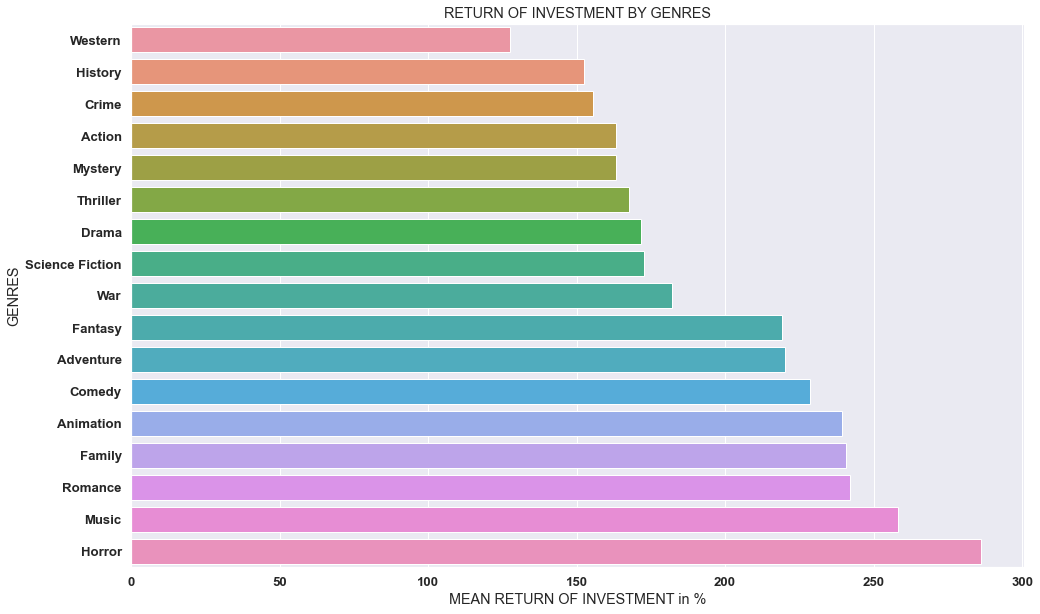

In [1214]:
#sns.barplot(data=genres_roi, x='genres', y='roi')

plt.figure(figsize=(16,10))
sns.set(font_scale=1.2)
sns.barplot(genres_roi['roi']*100,genres_roi['genres'])
sns.set_style("darkgrid")
plt.xticks()
plt.ylabel('GENRES')
plt.xlabel('MEAN RETURN OF INVESTMENT in %')
plt.title('RETURN OF INVESTMENT BY GENRES')
plt.savefig('roi_genres_mean.png')
plt.show()

In [1210]:
#Genres 'Foreign' performs worst
#we create dummies and drop 'foreign' to use 'foreign' as a base line
genres_dummies=pd.get_dummies(df_genres['genres'])
genres_dummies.drop('Western',axis=1, inplace=True)
genres_dummies.head()

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [1211]:
X=genres_dummies
Y = df_genres['roi']
X = sm.add_constant(X)

model = sm.OLS (Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.130
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           7.77e-11
Time:                        11:25:51   Log-Likelihood:                -32027.
No. Observations:               11162   AIC:                         6.409e+04
Df Residuals:                   11145   BIC:                         6.421e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5952      0.610      2.616      0.009       0.400       2.790
Action              0.0361      0.622      0.058      0.954      -1.183       1.255
Adventure           0.6056      0.627      0.965      0.334      -0.624       1.835
Animation           0.7988      0.664      1.203      0.229      -0.503       2.100
Comedy              0.6908      0.620      1.115      0.265      -0.524       1.905
Crime              -0.0416      0.631     -0.066      0.947      -1.278       1.194
Drama               0.1202      0.617      0.195      0.846      -1.090       1.331
Family              0.8123      0.640      1.269      0.204      -0.442       2.067
Fantasy             0.5977      0.642      0.932      0.352      -0.660       1.855
History            -0.0715      0.692     -0.103      0.918      -1.427       1.284
Horror              1.2679      0.645      1.966      0.049       0.004       2.532
Music               0.9882      0.716      1.380      0.168      -0.416       2.392
Mystery             0.0375      0.651      0.058      0.954      -1.238       1.313
Romance             0.8248      0.630      1.310      0.190      -0.409       2.059
Science Fiction     0.1326      0.637      0.208      0.835      -1.116       1.381
Thriller            0.0809      0.622      0.130      0.896      -1.137       1.299
War                 0.2257      0.707      0.319      0.750      -1.160       1.612
==============================================================================
Omnibus:                    13873.140   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3017706.421
Skew:                           6.651   Prob(JB):                         0.00
Kurtosis:                      82.445   Cond. No.                         65.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1212]:
genre_table=pd.DataFrame()
genre_table['coef']=model.params
genre_table['conf_low']=model.conf_int()[0]
genre_table['conf_up']=model.conf_int()[1]
genre_table['pvalues']=model.pvalues
genre_table['<10%']=model.pvalues<0.1
genre_table['<5%']=model.pvalues<0.05
genre_table['<1%']=model.pvalues<0.01
genre_table['rsquared']=model.rsquared
genre_table

,coef,conf_low,conf_up,pvalues,<10%,<5%,<1%,rsquared
const,1.595202,0.400046,2.790358,0.008901,True,True,True,0.007311
Action,0.036051,-1.182831,1.254934,0.953768,False,False,False,0.007311
Adventure,0.605590,-0.624256,1.835437,0.334459,False,False,False,0.007311
Animation,0.798751,-0.502602,2.100103,0.228953,False,False,False,0.007311
Comedy,0.690792,-0.523792,1.905377,0.264940,False,False,False,0.007311
Crime,-0.041633,-1.277568,1.194303,0.947356,False,False,False,0.007311
Drama,0.120231,-1.090096,1.330557,0.845617,False,False,False,0.007311
Family,0.812346,-0.441970,2.066662,0.204293,False,False,False,0.007311
Fantasy,0.597746,-0.659853,1.855344,0.351519,False,False,False,0.007311
History,-0.071504,-1.427124,1.284117,0.917654,False,False,False,0.007311


# REGRESSION MODEL (4)
### ACTORS

In [1113]:
#grab cast csv
df_cast = credits[['cast', 'id']]
df_cast['cast'] = df_cast['cast'].apply(lambda x: eval(x))
df_cast.rename(columns={'id': "movie_id"}, inplace=True)
df_cast.head()

<ipython-input-1113-4934b103825d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast['cast'] = df_cast['cast'].apply(lambda x: eval(x))
/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,cast,movie_id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...",11862


In [1114]:
#we keep only records with movie IDs of movies that are also in our Return Of Investment dataframe
df_cast=df_cast[df_cast['movie_id'].isin(set(df_roi['movie_id'])) ]

#add cast column to Return of investment dataframe
df_roi=df_roi.merge(df_cast,how='left', on='movie_id')


In [1115]:
# create dataframe for regressing actors against Return of Investment
df_actors=df_roi[['title','movie_id','cast','roi']]

In [1116]:
df_actors=df_actors.explode('cast')
df_actors.head()

,title,movie_id,cast,roi
0,Toy Story,862,"{'cast_id': 14, 'character': 'Woody (voice)', ...",11.451801
0,Toy Story,862,"{'cast_id': 15, 'character': 'Buzz Lightyear (...",11.451801
0,Toy Story,862,"{'cast_id': 16, 'character': 'Mr. Potato Head ...",11.451801
0,Toy Story,862,"{'cast_id': 17, 'character': 'Slinky Dog (voic...",11.451801
0,Toy Story,862,"{'cast_id': 18, 'character': 'Rex (voice)', 'c...",11.451801


In [1117]:
# extracting actor names from dictionary + create new column with actor name

def extract_name(x):
    try:
        name = x['name']
    except:
        name = 'Unknown'
    return name

df_actors['actor']=df_actors['cast'].apply(extract_name)

In [1118]:
df_actors

,title,movie_id,cast,roi,actor
0,Toy Story,862,"{'cast_id': 14, 'character': 'Woody (voice)', ...",11.451801,Tom Hanks
0,Toy Story,862,"{'cast_id': 15, 'character': 'Buzz Lightyear (...",11.451801,Tim Allen
0,Toy Story,862,"{'cast_id': 16, 'character': 'Mr. Potato Head ...",11.451801,Don Rickles
0,Toy Story,862,"{'cast_id': 17, 'character': 'Slinky Dog (voic...",11.451801,Jim Varney
0,Toy Story,862,"{'cast_id': 18, 'character': 'Rex (voice)', 'c...",11.451801,Wallace Shawn
...,...,...,...,...,...
4191,Sivaji: The Boss,24049,"{'cast_id': 65, 'character': 'Police Inspector...",0.583333,Livingston
4192,Antidur,63898,"{'cast_id': 2, 'character': 'Koshkin', 'credit...",-0.717400,Vladimir Turchinsky
4192,Antidur,63898,"{'cast_id': 3, 'character': '', 'credit_id': '...",-0.717400,Dmitriy Dyuzhev
4192,Antidur,63898,"{'cast_id': 4, 'character': '', 'credit_id': '...",-0.717400,Tatyana Dogileva


### SETTING THE NUMBER OF FILM CREDITS IT TAKES 
FILTERING ACTORS: MINIMUM AMOUNT OF CREDITS

In [1119]:
#I want to include only actors that ply in more than 1 movie
df_actors=df_actors.groupby('actor').filter(lambda x: len(x) > 20)
df_actors

,title,movie_id,cast,roi,actor
0,Toy Story,862,"{'cast_id': 14, 'character': 'Woody (voice)', ...",11.451801,Tom Hanks
0,Toy Story,862,"{'cast_id': 19, 'character': 'Hamm (voice)', '...",11.451801,John Ratzenberger
1,Jumanji,8844,"{'cast_id': 1, 'character': 'Alan Parrish', 'c...",3.043035,Robin Williams
1,Jumanji,8844,"{'cast_id': 2, 'character': 'Judy Sheperd', 'c...",3.043035,Kirsten Dunst
1,Jumanji,8844,"{'cast_id': 11, 'character': 'Carol Anne Parri...",3.043035,Patricia Clarkson
...,...,...,...,...,...
4187,Transformers: The Last Knight,335988,"{'cast_id': 7, 'character': 'Megatron / Canopy...",1.326701,Frank Welker
4188,The Dark Tower,353491,"{'cast_id': 9, 'character': 'Roland Deschain',...",0.183333,Idris Elba
4188,The Dark Tower,353491,"{'cast_id': 8, 'character': 'Walter O’Dim', 'c...",0.183333,Matthew McConaughey
4189,The Emoji Movie,378236,"{'cast_id': 15, 'character': 'Mary Meh (voice)...",0.338279,Jennifer Coolidge


#### actors dummies

In [1127]:
# average return of investment for each actor
#who has the worst impact - we will later drop when creating dummies to use as baseline
pd.pivot_table(df_actors,index=["actor"],values=["roi"], aggfunc=np.mean).sort_values(by='roi',ascending=False)

,roi
actor,
James Earl Jones,4.758136
Maggie Smith,4.560026
Tom Wilkinson,4.537836
John Ratzenberger,4.482734
Allison Janney,4.379749
...,...
Michelle Pfeiffer,0.651836
James Woods,0.555831
Mickey Rourke,0.529962


In [1128]:
#Tom Noonan is the worst performing actor. We drop him when creating dummies to use him as a baseline
actors_dummies=pd.get_dummies(df_actors['actor'])
actors_dummies.drop('Ray Liotta',axis=1,inplace=True)

In [1129]:
#Checking if certain Actor is in the dataframe
'Julia Roberts' in list(df_actors['actor'])

True

In [1130]:
#### actors regression modeling

In [1131]:
X=actors_dummies
Y = df_actors['roi']
X = sm.add_constant(X)

model = sm.OLS (Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.558
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           8.52e-09
Time:                        10:05:00   Log-Likelihood:                -21452.
No. Observations:                8027   AIC:                         4.348e+04
Df Residuals:                    7737   BIC:                         4.551e+04
Df Model:                         289                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4528      0.700      0.647      0.518      -0.919       1.824
Aaron Eckhart              0.4800      1.010      0.475      0.635      -1.500       2.460
Adam Sandler               1.5434      0.964      1.602      0.109      -0.345       3.432
Al Pacino                  0.4137      1.034      0.400      0.689      -1.612       2.440
Alan Arkin                 1.1486      1.021      1.125      0.261      -0.853       3.151
Alan Rickman               2.5600      0.980      2.611      0.009       0.638       4.482
Alan Tudyk                 2.6397      0.990      2.668      0.008       0.700       4.579
Alec Baldwin               1.2057      0.903      1.335      0.182      -0.565       2.976
Alfred Molina              1.8115      1.034      1.753      0.080      -0.214       3.837
Allison Janney             3.9270      0.990      3.969      0.000       1.987       5.867
Amy Adams                  1.2680      1.010      1.255      0.209      -0.712       3.248
Andy García                0.9502      1.034      0.919      0.358      -1.076       2.976
Angela Bassett             1.1932      1.047      1.140      0.254      -0.859       3.245
Angelina Jolie             0.6472      0.980      0.660      0.509      -1.274       2.569
Anne Hathaway              2.7661      1.034      2.676      0.007       0.740       4.792
Anthony Hopkins            1.2980      0.980      1.324      0.186      -0.624       3.220
Anthony Mackie             0.7796      0.964      0.809      0.418      -1.109       2.669
Antonio Banderas           0.8527      0.924      0.923      0.356      -0.958       2.663
Arnold Schwarzenegger      1.9027      0.929      2.047      0.041       0.081       3.725
Barry Pepper               0.3791      1.047      0.362      0.717      -1.673       2.431
Ben Affleck                2.1767      0.918      2.371      0.018       0.377       3.977
Ben Kingsley               0.5141      0.918      0.560      0.576      -1.286       2.314
Ben Stiller                1.5379      0.908      1.694      0.090      -0.242       3.318
Benicio del Toro           0.6759      1.021      0.662      0.508      -1.326       2.678
Beth Grant                 2.3930      0.999      2.395      0.017       0.434       4.352
Bill Hader                 1.9334      0.964      2.006      0.045       0.045       3.822
Bill Murray                2.5189      0.918      2.743      0.006       0.719       4.319
Bill Nighy                 1.7398      0.949      1.834      0.067      -0.120       3.600
Bill Paxton                2.2671      0.990      2.291      0.022       0.327       4.207
Bill Pullman               2.0695      1.021      2.026      0.043       0.068       4.072
Billy Bob Thornton         0.6057      0.999      0.606      0.544      -1.353  

### PICK VALUES FROM REGRESSION TABLE 

In [1132]:
actor_table=pd.DataFrame()
actor_table['coef']=model.params
actor_table['conf_low']=model.conf_int()[0]
actor_table['conf_up']=model.conf_int()[1]
actor_table['pvalues']=model.pvalues
actor_table['<5%']=model.pvalues<0.05
actor_table['<1%']=model.pvalues<0.01
actor_table['rsquared']=model.rsquared
actor_table

,coef,conf_low,conf_up,pvalues,<5%,<1%,rsquared
const,0.452773,-0.918815,1.824362,0.517585,False,False,0.054997
Aaron Eckhart,0.480033,-1.499685,2.459750,0.634574,False,False,0.054997
Adam Sandler,1.543430,-0.345458,3.432318,0.109250,False,False,0.054997
Al Pacino,0.413686,-1.612284,2.439657,0.688968,False,False,0.054997
Alan Arkin,1.148602,-0.853370,3.150574,0.260761,False,False,0.054997
...,...,...,...,...,...,...,...
William H. Macy,1.001588,-0.938131,2.941307,0.311474,False,False,0.054997
William Hurt,0.689669,-1.312303,2.691641,0.499504,False,False,0.054997
Winona Ryder,1.563861,-0.488071,3.615794,0.135216,False,False,0.054997
Woody Harrelson,1.194981,-0.605002,2.994964,0.193163,False,False,0.054997


In [1133]:
len(actor_table)

290

### FILTER ACTORS 
(1) PVALUES <0.06 

(2) confidence interval doesnt contain 0

(3) sort by coeficient

In [1134]:
actor_table=actor_table[(actor_table['conf_low']*actor_table['conf_up']>0) & (actor_table['pvalues']<0.06)].sort_values(by='coef',ascending=False)
actor_top20=actor_table.head(20).reset_index().rename(columns={'index':'actor'})

#attributing siginficance to actors with pvalues below 1%
actor_top20['siginficance']=np.where(actor_top20['pvalues']<0.01, '***','**')
actor_top20

,actor,coef,conf_low,conf_up,pvalues,<5%,<1%,rsquared,siginficance
0,James Earl Jones,4.305363,2.279393,6.331333,0.000031,True,True,0.054997,***
1,Maggie Smith,4.107253,2.081283,6.133224,0.000071,True,True,0.054997,***
2,Tom Wilkinson,4.085063,2.225202,5.944924,0.000017,True,True,0.054997,***
3,John Ratzenberger,4.029961,2.050243,6.009678,0.000067,True,True,0.054997,***
4,Allison Janney,3.926976,1.987257,5.866695,0.000073,True,True,0.054997,***
5,Seann William Scott,3.700180,1.648247,5.752112,0.000410,True,True,0.054997,***
6,Harrison Ford,3.689087,1.855114,5.523060,0.000081,True,True,0.054997,***
7,Jim Cummings,3.534572,1.482639,5.586505,0.000737,True,True,0.054997,***
8,Stephen Root,3.534430,1.645543,5.423318,0.000246,True,True,0.054997,***
9,Drew Barrymore,3.447652,1.573705,5.321598,0.000312,True,True,0.054997,***


/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


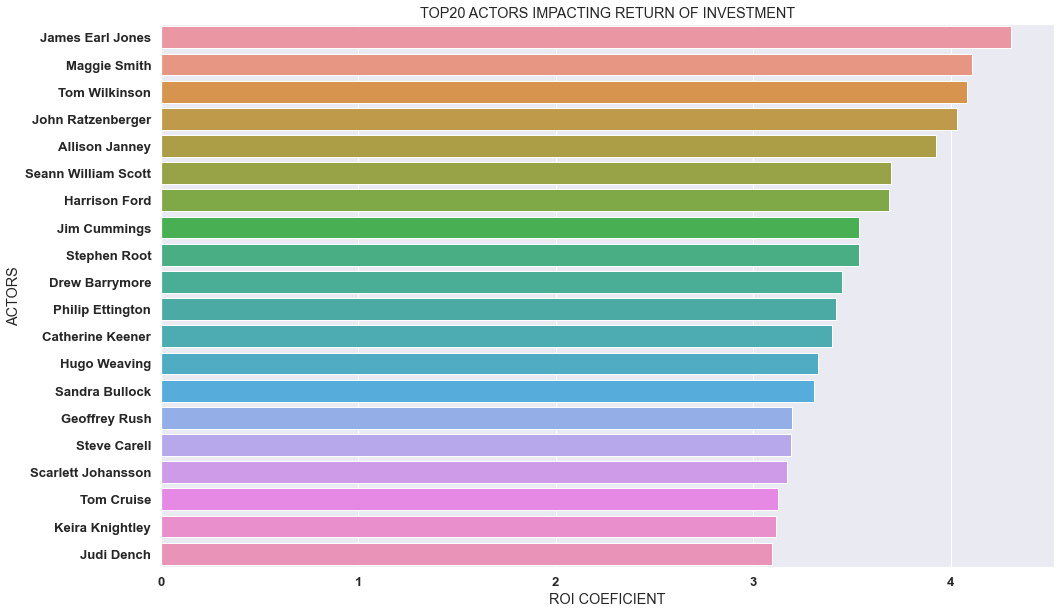

In [1136]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.2)
sns.barplot(actor_top20['coef'],actor_top20['actor'])
sns.set_style("darkgrid")
plt.xticks()
plt.ylabel('ACTORS')
plt.xlabel('ROI COEFICIENT')
plt.title('TOP20 ACTORS IMPACTING RETURN OF INVESTMENT')
plt.savefig('top20_actors.png')
plt.show()


#### what movies do they play

In [1140]:
#TABLE: TOP 20 ACTORS AND THEIR FILMS
set(df_actors['title'][df_actors['actor'].isin(list(actor_top20['actor']))]) #set of actors to compare with
actor_title=pd.pivot_table(df_actors,index=["actor"],values=['title'], aggfunc={'title':' | '.join})# group on actor names and join film titles
actor_title[actor_title.index.isin(list(actor_top20['actor']))]#keep only actors who are also in top 20 list


,title
actor,
Allison Janney,Faithful | Private Parts | The Object of My Af...
Catherine Keener,Out of Sight | Your Friends & Neighbors | 8MM ...
Drew Barrymore,Batman Forever | Boys on the Side | E.T. the E...
Geoffrey Rush,Elizabeth | Shakespeare in Love | Mystery Men ...
Harrison Ford,Clear and Present Danger | The Fugitive | Blad...
Hugo Weaving,Babe | Babe: Pig in the City | The Matrix | Th...
James Earl Jones,Jefferson in Paris | Clear and Present Danger ...
Jim Cummings,Pocahontas | The Lion King | The Pagemaster | ...
John Ratzenberger,Toy Story | The Empire Strikes Back | Gandhi |...


In [1144]:
#TABLE: TOP 20 ACTORS AND THEIR FILMS SORTED BY ACTOR'S ROI COEFICENT 
actor_top20_films=actor_top20.merge(actor_title,how='left',on='actor')

actor_top20_films[['actor','title']].head().to_excel('top20actors_movies_.xlsx')
actor_top20_films[['actor','title']].head().style.set_properties(subset=['title'], **{'width': '800px'})

,actor,title
0,James Earl Jones,Jefferson in Paris | Clear and Present Danger | The Lion King | The Naked Gun 33⅓: The Final Insult | The Naked Gun 33⅓: The Final Insult | The Empire Strikes Back | Return of the Jedi | Conan the Barbarian | The Hunt for Red October | Matewan | Fantasia 2000 | Patriot Games | Coming to America | Three Fugitives | Robots | Star Wars: Episode III - Revenge of the Sith | Pinocchio and the Emperor of the Night | Click | Welcome Home Roscoe Jenkins | Earth | Gimme Shelter | Rogue One: A Star Wars Story
1,Maggie Smith,The First Wives Club | Tea with Mussolini | Sister Act | Sister Act 2: Back in the Habit | Hook | Harry Potter and the Philosopher's Stone | Gosford Park | Clash of the Titans | Harry Potter and the Chamber of Secrets | Harry Potter and the Prisoner of Azkaban | Harry Potter and the Goblet of Fire | Becoming Jane | Harry Potter and the Order of the Phoenix | Harry Potter and the Half-Blood Prince | Nanny McPhee and the Big Bang | Gnomeo & Juliet | Harry Potter and the Deathly Hallows: Part 2 | The Best Exotic Marigold Hotel | Quartet | My Old Lady | The Second Best Exotic Marigold Hotel | The Lady in the Van
2,Tom Wilkinson,Sense and Sensibility | In the Name of the Father | The Ghost and the Darkness | The Full Monty | Rush Hour | Shakespeare in Love | Ride with the Devil | The Patriot | Eternal Sunshine of the Spotless Mind | Batman Begins | The Exorcism of Emily Rose | Michael Clayton | RockNRolla | Valkyrie | Duplicity | The Ghost Writer | The Green Hornet | Burke & Hare | The Conspirator | The Debt | Mission: Impossible - Ghost Protocol | The Best Exotic Marigold Hotel | The Lone Ranger | The Grand Budapest Hotel | Belle | Selma | Unfinished Business | Little Boy | The Choice | Snowden | Denial
3,John Ratzenberger,"Toy Story | The Empire Strikes Back | Gandhi | A Bug's Life | Superman II | Toy Story 2 | Outland | Monsters, Inc. | Firefox | Finding Nemo | The Incredibles | Cars | Ratatouille | WALL·E | Up | Toy Story 3 | Cars 2 | Brave | Monsters University | Planes: Fire & Rescue | Inside Out | The Good Dinosaur | Finding Dory | Cars 3"
4,Allison Janney,Faithful | Private Parts | The Object of My Affection | Six Days Seven Nights | 10 Things I Hate About You | Drop Dead Gorgeous | American Beauty | The Hours | Finding Nemo | Over the Hedge | Hairspray | Juno | Away We Go | Life During Wartime | The Help | A Thousand Words | The Way Way Back | Mr. Peabody & Sherman | Bad Words | Tammy | The DUFF | Spy | Minions | Finding Dory | Miss Peregrine's Home for Peculiar Children | The Girl on the Train


#### WHICH MOVIE CONTRIBUTED MOST TO THEIR COEFICENT^

In [1145]:
top_actor_top_movie=df_actors[['actor','title','roi']][df_actors['actor'].isin(list(actor_top20['actor']))].sort_values(by='roi',ascending=False).groupby('actor').head(1)
top_actor_top_movie.to_excel('topactor_topmovie_.xlsx')
top_actor_top_movie.reset_index()

,index,actor,title,roi
0,285,Drew Barrymore,E.T. the Extra-Terrestrial,74.520507
1,408,Tom Wilkinson,The Full Monty,72.671463
2,4109,Stephen Root,Get Out,49.486850
3,4109,Catherine Keener,Get Out,49.486850
4,2322,Allison Janney,Juno,29.854878
5,1540,Scarlett Johansson,Lost in Translation,28.930964
6,296,James Earl Jones,The Empire Strikes Back,28.911111
7,296,John Ratzenberger,The Empire Strikes Back,28.911111
8,296,Harrison Ford,The Empire Strikes Back,28.911111
9,2835,Geoffrey Rush,The King's Speech,26.614103


/Users/spitzer/opt/anaconda3/envs/kittycat/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


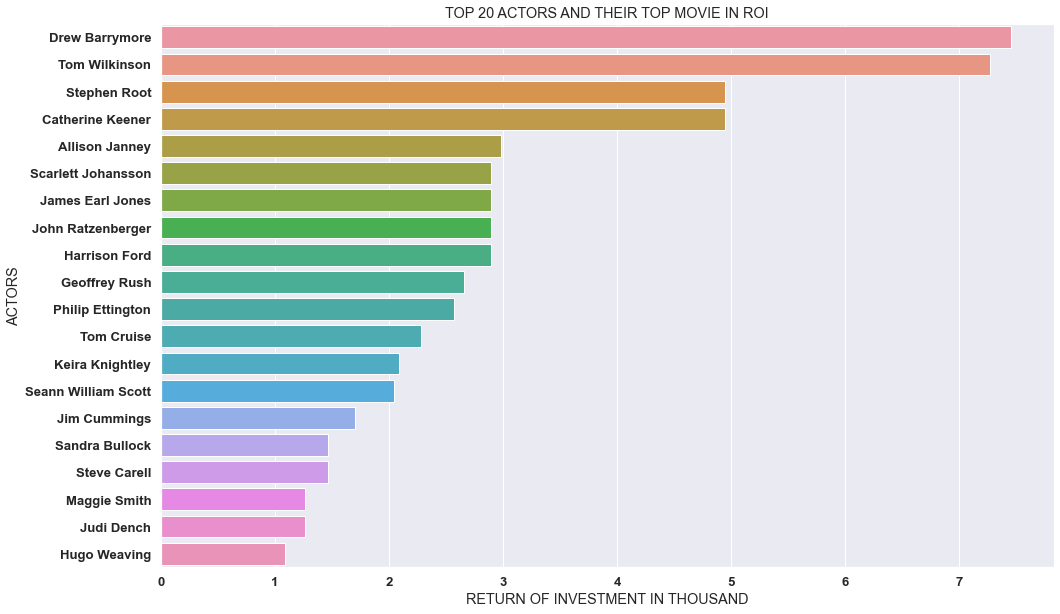

In [1185]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.2)
sns.barplot(top_actor_top_movie['roi']/10,top_actor_top_movie['actor'])
sns.set_style("darkgrid")
plt.xticks()
plt.ylabel('ACTORS')
plt.xlabel('RETURN OF INVESTMENT IN THOUSAND')
plt.title('TOP 20 ACTORS AND THEIR TOP MOVIE IN ROI')
plt.savefig('top20_actors_best_movie.png')
plt.show()

# REGRESSION MODEL (5):: VOTE AVERAGE
VOTE AVERAGE

In [697]:
X=pd.get_dummies(df_roi['vote_average'],drop_first=True)# first is the average rating 0.0
Y=df_roi['roi']
X = sm.add_constant(X)
model = sm.OLS (Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     5.569
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           5.36e-39
Time:                        15:30:49   Log-Likelihood:                -13421.
No. Observations:                4395   AIC:                         2.697e+04
Df Residuals:                    4332   BIC:                         2.737e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3543      2.983     -0.119      0.905      -6.202       5.493
1.0           -0.3631      5.965     -0.061      0.951     -12.058      11.332
1.7           -0.5945      5.965     -0.100      0.921     -12.289      11.100
2.0           -0.5235      5.965     -0.088      0.930     -12.218      11.171
2.3           -0.6445      5.965     -0.108      0.914     -12.339      11.050
2.6           -0.4290      5.965     -0.072      0.943     -12.124      11.266
2.8            1.3284      5.965      0.223      0.824     -10.366      13.023
3.0           -0.0150      3.946     -0.004      0.997      -7.750       7.720
3.1           -0.1024      4.716     -0.022      0.983      -9.348       9.143
3.2            1.7623      4.716      0.374      0.709      -7.483      11.008
3.3            0.6896      4.218      0.163      0.870      -7.580       8.959
3.4            0.1109      4.716      0.024      0.981      -9.135       9.356
3.5            0.5343      3.773      0.142      0.887      -6.862       7.931
3.6            0.2339      3.653      0.064      0.949      -6.928       7.395
3.7           -0.1932      3.946     -0.049      0.961      -7.929       7.542
3.8            1.0304      3.653      0.282      0.778      -6.131       8.192
3.9           -0.2448      3.565     -0.069      0.945      -7.234       6.744
4.0            0.0754      3.444      0.022      0.983      -6.677       6.827
4.1            0.9865      3.222      0.306      0.759      -5.329       7.302
4.2            0.6801      3.365      0.202      0.840      -5.917       7.277
4.3           -0.0454      3.401     -0.013      0.989      -6.712       6.622
4.4            0.7470      3.209      0.233      0.816      -5.545       7.039
4.5            0.5654      3.198      0.177      0.860      -5.705       6.836
4.6            1.3786      3.144      0.439      0.661      -4.785       7.542
4.7            1.3403      3.115      0.430      0.667      -4.767       7.448
4.8            0.6156      3.092      0.199      0.842      -5.447       6.678
4.9            1.6056      3.087      0.520      0.603      -4.447       7.658
5.0            1.1027      3.040      0.363      0.717      -4.857       7.063
5.1            0.8433      3.041      0.277      0.782      -5.118       6.805
5.2            1.6195      3.043      0.532      0.595      -4.347       7.586
5.3            1.1456      3.026      0.379      0.705      -4.787       7.078
5.4            1.0893      3.027      0.360      0.719      -4.845       7.024
5.5            1.4141      3.016      0.469      0.639      -4.499       7.328
5.6            1.7286      3.012      0.574      0.566      -4.177       7.635
5.7            1.5188      3.014      0.504      0.614      -4.390       7.428
5.8            2.0117      3.006      0.669      0.503      -3.882       7.906
5.

INTERPRETATION
From Rating average 7.5 it seems to have an impact on Return of investment
Model just explains 7% of the variation in Return of Investment

# REGRESSION 6 : FRANCHISE

In [892]:
#### correlation check

In [893]:
df_roi['roi'].corr(df_roi['franchise'])

0.2218852247813992

In [910]:
# Your code here:

X = df_roi['franchise']
X = sm.add_constant(X) # We must add the intercept using the add_constant function
Y = df_roi.roi

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     227.5
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           3.73e-50
Time:                        00:20:21   Log-Likelihood:                -13479.
No. Observations:                4395   AIC:                         2.696e+04
Df Residuals:                    4393   BIC:                         2.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6126      0.090     17.906      0.000       1.436       1.789
franchise      2.7606      0.183     15.082      0.000       2.402       3.119
==============================================================================
Omnibus:                     5735.081   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1295339.164
Skew:                           7.211   Prob(JB):                         0.00
Kurtosis:                      85.858   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Extracting from regression table

In [912]:
franchise_table=pd.DataFrame()
franchise_table['coef']=model.params
franchise_table['conf_low']=model.conf_int()[0]
franchise_table['conf_up']=model.conf_int()[1]
franchise_table['pvalues']=model.pvalues
franchise_table['<5%']=model.pvalues<0.05
franchise_table['<1%']=model.pvalues<0.01
franchise_table['rsquared']=model.rsquared
franchise_table

,coef,conf_low,conf_up,pvalues,<5%,<1%,rsquared
const,1.612587,1.436031,1.789143,2.890049e-69,True,True,0.049233
franchise,2.760554,2.401721,3.119387,3.734435e-50,True,True,0.049233


In [915]:
df_roi['franchise'].value_counts()

0    3331
1    1064
Name: franchise, dtype: int64

In [920]:
# MEAN ROI OF FRANCHISE MOVIES
df_roi['roi'][df_roi['franchise']==1].mean()*100

248.51361440559438

In [921]:
# MEAN ROI OF NON-FRANCHISE MOVIES
df_roi['roi'][df_roi['franchise']==0].mean()*100

52.35719375

<AxesSubplot:xlabel='roi', ylabel='Count'>

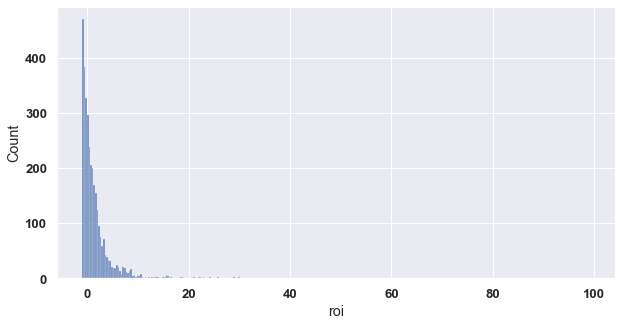

In [922]:
sns.histplot(df_roi['roi'][df_roi['franchise']==0])

<AxesSubplot:xlabel='roi', ylabel='Count'>

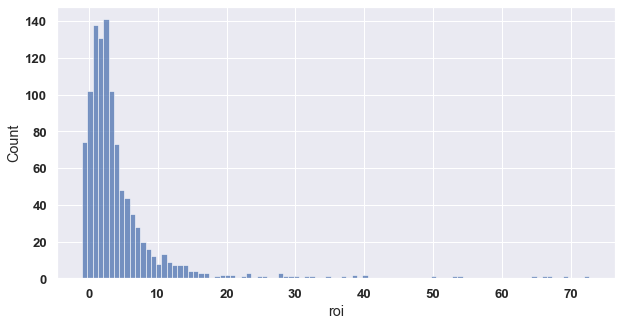

In [923]:
sns.histplot(df_roi['roi'][df_roi['franchise']==1])
